interactive(children=(IntSlider(value=0, description='frame', max=49), Output()), _dom_classes=('widget-intera…

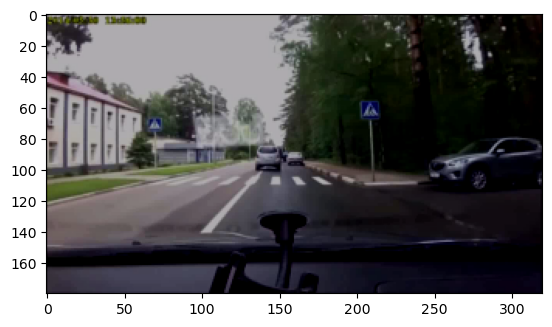

In [1]:
import albumentations as A
from ipywidgets import interact
from matplotlib import pyplot as plt
import numpy as np 
import cv2


def get_frames(path):
    cap = cv2.VideoCapture(path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    imgs = []        
    for fidx in range(frames):
        _, img = cap.read()            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
    
    ret = {f"image{i}":imgs[i] for i in range(1, len(imgs))}
    ret['image'] = imgs[0]
    return ret

def aug(transforms, images):
    res = transforms(**images)
    images = np.zeros((len(images), 180, 320, 3), dtype=np.uint8)
    images[0, :, :, :] = res["image"]
    for i in range(1, len(images)):
        images[i, :, :, :] = res[f"image{i}"]
    return images, res

transforms = A.Compose([
    A.Resize(height=180, width=320),
    A.RandomBrightnessContrast(p=0.2),

],additional_targets={f"image{i}":"image" for i in range(1, 50)})

frames = get_frames("./data/train/TRAIN_0001.mp4")
frames,res = aug(transforms, frames)

@interact(frame=(0, len(frames)-1))
def show_frame(frame=(0)):
    plt.imshow(frames[frame,:,:,:])
    
show_frame()

[[[[ 88  81  93]
   [106  99 111]
   [106  99 111]
   ...
   [ 61  57  79]
   [ 60  56  78]
   [ 48  44  66]]

  [[ 96  89 101]
   [114 107 119]
   [114 107 119]
   ...
   [ 66  62  84]
   [ 65  61  83]
   [ 53  49  71]]

  [[ 95  88 100]
   [118 111 123]
   [117 110 122]
   ...
   [ 65  61  83]
   [ 64  60  82]
   [ 52  48  70]]

  ...

  [[134 132 110]
   [121 121  87]
   [171 180  96]
   ...
   [ 96  75  73]
   [ 96  75  73]
   [ 77  56  54]]

  [[184 177 188]
   [198 193 193]
   [216 216 186]
   ...
   [100  79  77]
   [ 98  77  75]
   [ 76  55  53]]

  [[150 142 161]
   [187 181 187]
   [214 210 201]
   ...
   [ 95  74  72]
   [ 92  71  69]
   [ 70  49  47]]]


 [[[ 88  81  93]
   [107 100 112]
   [106  99 111]
   ...
   [ 61  57  79]
   [ 60  56  78]
   [ 48  44  66]]

  [[ 96  89 101]
   [114 107 119]
   [116 109 121]
   ...
   [ 66  62  84]
   [ 65  61  83]
   [ 53  49  71]]

  [[ 96  89 101]
   [119 112 124]
   [118 111 123]
   ...
   [ 65  61  83]
   [ 64  60  82]
   [ 52  48

interactive(children=(IntSlider(value=0, description='frame', max=49), Output()), _dom_classes=('widget-intera…

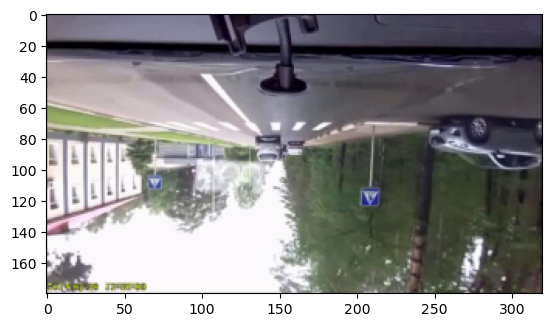

In [3]:
from utils import CustomDataset
transforms = A.Compose([
    A.Resize(height=180, width=320),
    A.VerticalFlip(p=1),

],additional_targets={f"image{i}":"image" for i in range(1, 50)})

dataset = CustomDataset(["./train/TRAIN_0001.mp4"],transform=transforms)
frames = dataset.__getitem__(0)
print(frames)

@interact(frame=(0, len(frames)-1))
def show_frame(frame=(0)):
    plt.imshow(frames[frame,:,:,:])
    
show_frame()

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np


class MyDataset(Dataset):
    def __init__(self):
        x = np.random.rand(1000, 3)  # 1000 3-dim samples
        self.x = [x[i].tolist() for i in range(1000)]
        y = np.random.randint(low=0, high=2, size=(1000,))
        self.y = [y[i] for i in range(1000)]

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


def collate_fn(batch):
    data_list, label_list = [], []
    for _data, _label in batch:
        data_list.append(_data)
        label_list.append(_label)
    return torch.Tensor(data_list), torch.LongTensor(label_list)


if __name__ == "__main__":
    dataset = MyDataset()
    print(len(dataset))
    print(dataset[-1])

    print("-----not collate_fn-----")
    dataloader = DataLoader(dataset, batch_size=3, shuffle=False)
    for data, label in dataloader:
        print(data)
        print(label)
        break
    print("-----collate_fn-----")
    dataloader = DataLoader(dataset, batch_size=3, shuffle=False, collate_fn=collate_fn)
    for data, label in dataloader:
        print(data)
        print(label)
        break

1000
([0.7616326288782138, 0.22516216660159494, 0.4345887279439895], 0)
-----not collate_fn-----
[tensor([0.0781, 0.9364, 0.9289], dtype=torch.float64), tensor([0.8288, 0.1655, 0.7579], dtype=torch.float64), tensor([0.4743, 0.8764, 0.2264], dtype=torch.float64)]
tensor([0, 0, 1])
-----collate_fn-----
tensor([[0.0781, 0.8288, 0.4743],
        [0.9364, 0.1655, 0.8764],
        [0.9289, 0.7579, 0.2264]])
tensor([0, 0, 1])
